__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$ cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?

In [1]:
function derivadaNumerica(f,x,h) #Definimos la funcion que hara el calculo de la derivada númerica
    return (f(x+h)-f(x))/h
end

derivadaNumerica (generic function with 1 method)

In [2]:
derivadaNumerica(x->cos(x),1/2,0.1) # el valor aproximado es este

-0.5224694698069443

In [3]:
-sin(1/2)

-0.479425538604203

hs (generic function with 1 method)

50-element Array{Any,1}:
 4.9        
 4.8        
 4.7        
 4.6        
 4.5        
 4.4        
 4.3        
 4.2        
 4.1        
 4.0        
 3.9        
 3.8        
 3.7        
 ⋮          
 1.1        
 1.0        
 0.9        
 0.8        
 0.7        
 0.6        
 0.5        
 0.4        
 0.3        
 0.2        
 0.1        
 1.02696e-15

inversa (generic function with 1 method)

50-element Array{Any,1}:
  0.204082  
  0.208333  
  0.212766  
  0.217391  
  0.222222  
  0.227273  
  0.232558  
  0.238095  
  0.243902  
  0.25      
  0.25641   
  0.263158  
  0.27027   
  ⋮         
  0.909091  
  1.0       
  1.11111   
  1.25      
  1.42857   
  1.66667   
  2.0       
  2.5       
  3.33333   
  5.0       
 10.0       
  9.73751e14

In [8]:
using SymPy


In [9]:
using PyPlot 


In [29]:
function Deriv(f,x,exa,N) # Con esta funcion graficaremos la derivada de cos mientras h se hace pequeña
SE=[] # Definimos un arreglo vacio donde iremos guardando los valores de nuestra derivada mientras esta se aproxima a la solucion exacta.
X=[]
for i in 1:N # Con este ciclo for obtendremos el valor de la derivada conforme h se hace más pequeña
        push!(X,i)
        h=1/factorial(i)  #h se hara mas pequeña confome mas iteraciones haya y por ende deberá tender al valor de exa
        push!(SE,derivadaNumerica(f,x,h)) 
        end
    xlabel("iteraciones donde h=1/iteracion!")
    ylabel("valor de la derivada calculada que se debe aproximar a -0.479 conforme las iteraciones aumenten")
scatter(X,SE)
end

Deriv (generic function with 2 methods)

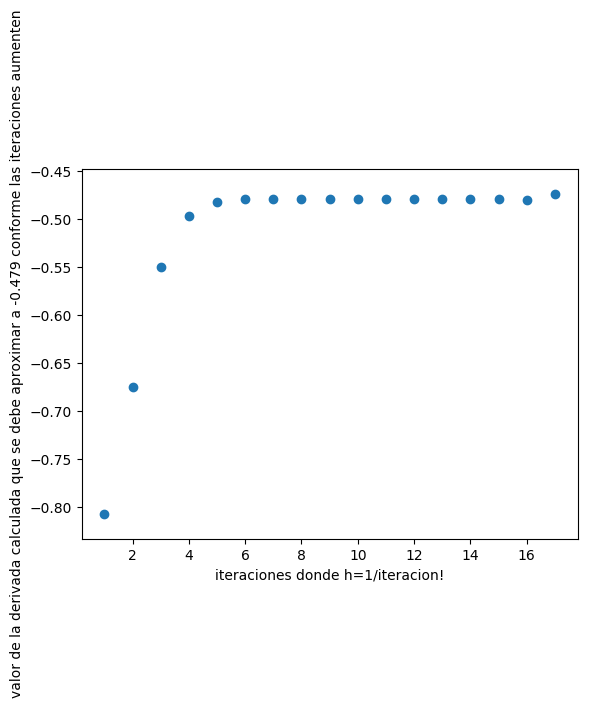

PyObject <matplotlib.collections.PathCollection object at 0x7f6601da4bd0>

In [30]:
Deriv(x->cos.(x),1/2,-0.479425538604203,17)

In [31]:
function Error(f,x,exa,N)
Error=[]
X=[]
for i in 1:N # Con este ciclo for obtendremos el valor de la derivada conforme h se hace más pequeña
        push!(X,i)
        h=1/factorial(i)  #h se hara mas pequeña confome mas iteraciones haya y por ende deberá tender al valor de exa
    er=abs((derivadaNumerica(f,x,h)-exa)/exa)
        push!(Error,er)
end
xlabel("iteraciones donde h=1/iteracion!")
ylabel("valor del error que se debe aproximar a 0 conforme las iteraciones aumenten")
scatter(X,Error)
end

Error (generic function with 1 method)

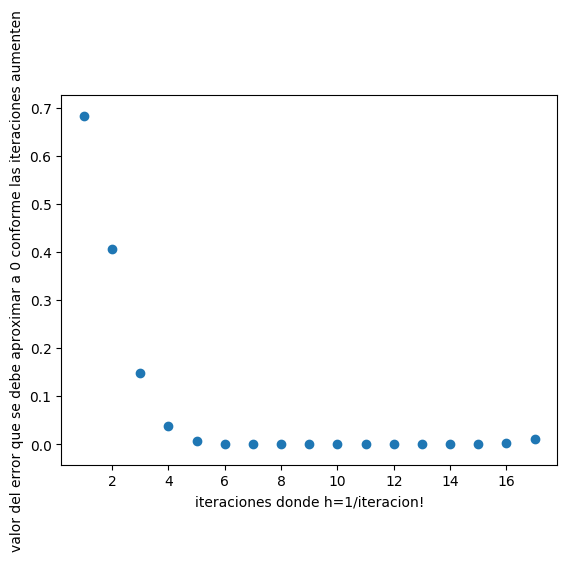

PyObject <matplotlib.collections.PathCollection object at 0x7f6601cee950>

In [32]:
Error(x->cos.(x),1/2,-0.479425538604203,17)

__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

__Nota:__ Entregar en $\LaTeX$ en el notebook de la tarea.

Desarrollando las series de Taylor de $f(x+h)$  y de $f(x-h)$ tenemos que


$$f(x+h)=f(x)+hf'(x)+\dfrac{h^{2}}{2}f''(x)+\dfrac{h^{3}}{6}f'''(x)+\mathcal{O}(h^{4})$$ 


$$f(x-h)=f(x)-hf'(x)+\dfrac{h^{2}}{2}f''(x)-\dfrac{h^{3}}{6}f'''(x)+\mathcal{O}(h^{4})$$ 


sumamos las dos expresiones anteriores 


$$f(x+h)-f(x-h)=2hf'(x)+\dfrac{h^{3}}{3}f'''(x)+\mathcal{O}(h^{5})=
2hf'(x)+\mathcal{O}(h^{3})$$

dividiendo entre $\space$  $2h$ $\space$ tenemos que

$$\frac{f(x+h)-f(x-h)}{2h}-f'(x)=\mathcal{O}(h^{2})$$ 

y llegamos hasta $$f'(x)\approx \frac{f(x+h) -f(x-h)}{2h}$$


In [34]:
function DS(f,x,h)
    DS=(f(x+h)-f(x-h))/2h
    return DS
end

DS (generic function with 1 method)

In [35]:
DS(x->cos(x),1/2,0.1)

-0.4786268954660339

In [36]:
function DerivSim(f,x,exa,N) # Con esta funcion graficaremos la derivada de cos mientras h se hace pequeña
SE=[] # Definimos un arreglo vacio donde iremos guardando los valores de nuestra derivada mientras esta se aproxima a la solucion exacta.
X=[]
for i in 1:N # Con este ciclo for obtendremos el valor de la derivada conforme h se hace más pequeña
        push!(X,i)
        h=1/factorial(i)  #h se hara mas pequeña confome mas iteraciones haya y por ende deberá tender al valor de exa
        push!(SE,DS(f,x,h)) 
        end
    xlabel("iteraciones donde h=1/iteracion!")
    ylabel("valor de la derivada calculada que se debe aproximar a -0.479 conforme las iteraciones aumenten")
scatter(X,SE)
end

DerivSim (generic function with 1 method)

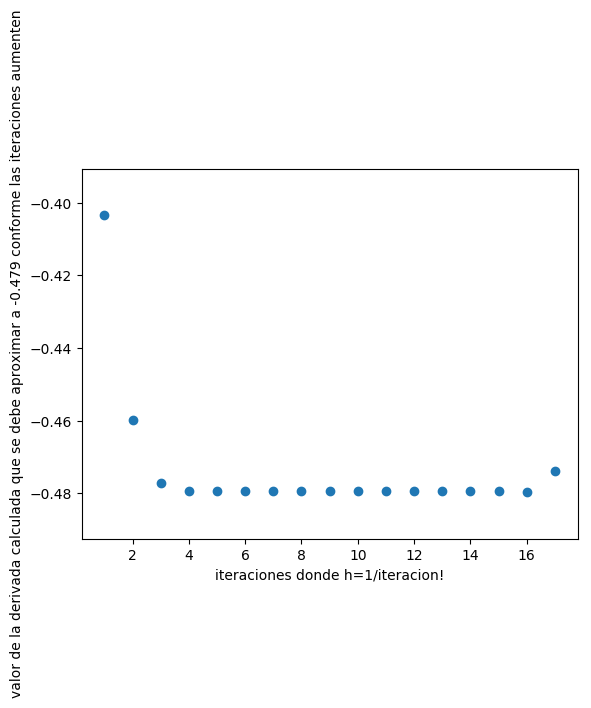

PyObject <matplotlib.collections.PathCollection object at 0x7f6601c35850>

In [37]:
DerivSim(x->cos.(x),1/2,-0.479425538604203,17)

In [38]:
function ErrorDS(f,x,exa,N)
Error=[]
X=[]
for i in 1:N # Con este ciclo for obtendremos el valor de la derivada conforme h se hace más pequeña
        push!(X,i)
        h=1/factorial(i)  #h se hara mas pequeña confome mas iteraciones haya y por ende deberá tender al valor de exa
    er=abs((DS(f,x,h)-exa)/exa)
        push!(Error,er)
end
xlabel("iteraciones donde h=1/iteracion!")
ylabel("valor del error que se debe aproximar a 0 conforme las iteraciones aumenten")
scatter(X,Error)
end

ErrorDS (generic function with 1 method)

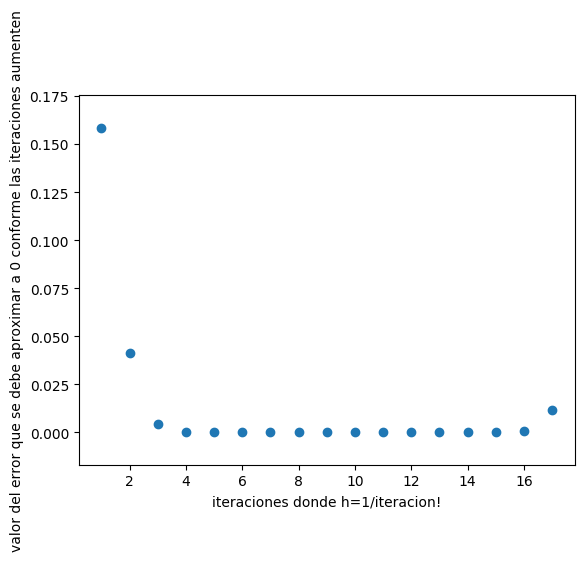

PyObject <matplotlib.collections.PathCollection object at 0x7f6601b62850>

In [39]:
ErrorDS(x->cos.(x),1/2,-0.479425538604203,17)

Aca podemos ver que con la Derivada Simetrica se llega más rapido a mejores aproximaciones de la derivada real. Y el error también tiende más rápido a 0.

__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Para demostrar que $\Delta_h$ es una operador lineal debemos de ver que abra suma y saque escalares entonces:

Demostración: 

$$\Delta_{h}(\alpha f +g) = \sum\nolimits_{n=0}^\infty{n = 1}^{\infty} \frac{h^n}{n!} \frac{d^n(\alpha f +g)}{dx^n}$$

Usando la linealidad del operador derivada 

$$ = \sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\left[\alpha \frac{d^n f}{dx^2} +\frac{d^n g}{dx^2}\right]$$

distribuimos y tenemos que

$$= \sum\nolimits_{n = 1}^{\infty} \left[\alpha\frac{h^n}{n!}\frac{d^n f}{dx^2} + \frac{h^n}{n!} \frac{d^n g}{dx^2}\right]$$

Usando la linealidad del operador suma 

$$ = \alpha \sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n f}{dx^2} +\sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n g}{dx^2}$$

$$= \alpha \Delta_{h}(f) +\Delta_{h}(g)$$


__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

Comenzemos definiendo la serie de Taylor para la funcion exponencial 

$$e^x = \sum_{n = 0}^{\infty} \frac{x^n}{n!}$$

y entonces tenemos que 
$$\Delta_{h} = e^{h\frac{d}{dx}} -1$$



con lo que llegamos a 
$$\frac{1}{h}log(\Delta_{h} +1) = \frac{d}{dx}$$

y $$log(1+x)= 0+\left. \frac{1}{1+x}\right|_{x=0}x-\frac{x^2}{2}$$

por ultimo 
$$\frac{d}{dx} =\frac{1}{h}\left(\Delta_{h} -\frac{1}{2} \Delta_{h}^2+.....\right)$$ 
